# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv

load_dotenv()
adni_path = os.getenv("DATASET_PATH_L")
oasis_path = os.getenv("DATASET_PATH_TWO_PL")

In [2]:
adni = pd.read_csv(adni_path)
adni.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,1140,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1051,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,15,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,680,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,324,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


In [3]:
oasis = pd.read_csv(oasis_path)
oasis.head()

,Label,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,30879,0,64.585900,0,27.0,0.377501,128.715226,0.422342,115.630163,15.181458,...,286.270009,0.289728,206.373786,44.577974,539.225137,3.320292,22924.739100,3.3445,2251,7338.2
1,31129,0,68.076660,2,20.0,0.657212,51.830551,0.557254,84.225204,8.530596,...,282.873623,0.310507,206.276556,39.697933,542.232602,2.864138,18182.687670,2.9605,2924,5438.6
2,30605,1,76.221760,1,28.0,0.520032,86.558742,0.594543,123.662642,13.400504,...,244.274039,0.370189,201.216707,46.081559,560.592790,3.415186,28045.350990,3.3145,4042,8434.4
3,30039,0,73.221085,0,30.0,0.396133,60.731686,0.596733,122.546512,15.571183,...,226.713342,0.517430,232.983710,30.461877,705.221498,2.937422,1196.160472,3.1505,3485,7476.2
4,30079,0,45.872690,0,30.0,0.404800,108.808540,0.520363,98.065558,13.483247,...,202.074647,0.354851,169.528802,50.680275,476.040561,3.017047,47743.254120,3.5420,3964,8021.8


In [4]:
# Define a mapping from oasis column names to adni column names
rename_map = {
    'Label': 'RID',
    'Age': 'Ageatscreening',
    'DIAGNOSIS': 'Diagnosis',
    'MMSE': 'MMSE0m',
    'Hip ASM': 'HipsASMbaseline',
    'Hip Contrast': 'HipsContrastbaseline',
    'Hip Correlation': 'HipsCorelationbaseline',
    'Hip Variance ': 'HipsVariancebaseline',
    'Hip Sum Average': 'HipsSumAveragebaseline',
    'Hip Sum Variance': 'HipsSumVariancebaseline',
    'Hip Entropy': 'HipsEntropybaseline',
    'Hip Clusterhade': 'HipsClusterShadebaseline',
    'ERC ASM': 'ERCsASMbaseline',
    'ERC CONTRAST': 'ERCsContrastbaseline',
    'ERC CORRELATION': 'ERCsCorelationbaseline',
    'ERC VARIANCE ': 'ERCsVariancebaseline',
    'ERC SUM AVERAGE': 'ERCsSumAveragebaseline',
    'ERC SUM VARIANCE': 'ERCsSumVariancebaseline',
    'ERC ENTROPY': 'ERCsEntropybaseline',
    'ERC CLUSTER SHADE': 'ERCsClusterShadebaseline',
    'TOTAL_HIPPOCAMPUS_VOLUME': 'HipposcampusVolumebaseline'
    # Columns already matching like 'ERCs_thicknessbaseline', 'ERCsVolumebaseline', 'dataset', 'Gender' don't need mapping
}

# Rename columns in oasis
oasis = oasis.rename(columns=rename_map)

# Reorder oasis columns to match adni
oasis = oasis[adni.columns]

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

adni['dataset'] = 'ADNI'
oasis['dataset'] = 'OASIS'

# Ensure diagnosis is string and drop missing values
adni['Diagnosis'] = adni['Diagnosis'].astype(str)
oasis['Diagnosis'] = oasis['Diagnosis'].astype(str)
oasis = oasis.dropna(subset=['Diagnosis'])

# -----------------------------
# 4. Merge datasets
# -----------------------------
merged_df = pd.concat([adni, oasis], ignore_index=True)

# -----------------------------
# 5. Select features for ANOVA
# -----------------------------
# Example: all texture and volumetric features (replace with your list)
features = [
    'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
    'HipsVariancebaseline', 'HipsSumAveragebaseline', 'HipsSumVariancebaseline',
    'HipsEntropybaseline', 'HipsClusterShadebaseline',
    'ERCsASMbaseline', 'ERCsContrastbaseline', 'ERCsCorelationbaseline',
    'ERCsVariancebaseline', 'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
    'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
    'ERCs_thicknessbaseline', 'ERCsVolumebaseline', 'HipposcampusVolumebaseline'
]

# -----------------------------
# 6. Run ANOVA per feature
# -----------------------------
anova_results = {}
for feat in features:
    group_adni = merged_df[merged_df['dataset']=='ADNI'][feat].dropna()
    group_oasis = merged_df[merged_df['dataset']=='OASIS'][feat].dropna()
    f_stat, p_val = f_oneway(group_adni, group_oasis)
    anova_results[feat] = {'F_stat': f_stat, 'p_value': p_val}

anova_df = pd.DataFrame(anova_results).T.sort_values('p_value')
print(anova_df)


                                 F_stat        p_value
HipsASMbaseline             4396.310374   0.000000e+00
HipsVariancebaseline        4014.498297   0.000000e+00
HipsEntropybaseline         7936.750719   0.000000e+00
HipsSumAveragebaseline      8626.956266   0.000000e+00
HipposcampusVolumebaseline  4501.205085   0.000000e+00
HipsSumVariancebaseline     2791.647188  7.101206e-320
ERCsVolumebaseline          1921.448267  3.962544e-254
HipsClusterShadebaseline     821.627829  8.055655e-139
HipsContrastbaseline         472.956810   4.944631e-89
ERCs_thicknessbaseline       306.147615   2.613756e-61
ERCsContrastbaseline         217.414332   1.941383e-45
ERCsSumAveragebaseline       209.508634   5.530132e-44
ERCsCorelationbaseline       172.334193   6.288115e-37
ERCsASMbaseline              155.363846   1.085103e-33
ERCsClusterShadebaseline     144.332229   1.626134e-31
HipsCorelationbaseline        39.793448   3.931891e-10
ERCsEntropybaseline           34.724963   4.887118e-09
ERCsVarian

In [10]:
import numpy as np
from neuroHarmonize import harmonizationLearn

# After merging
merged_df = pd.concat([adni, oasis], ignore_index=True)

# Ensure covariates and batch are set up
merged_df['dataset'] = merged_df['dataset'].astype(str)
covars = merged_df[['dataset', 'Ageatscreening', 'Gender']].copy()
covars = covars.rename(columns={'dataset': 'SITE'})  # neuroHarmonize expects column named SITE

# Prepare the data matrix: features only
numeric_features = features  # your list
X = merged_df[numeric_features].to_numpy()

# Remove rows with missing in X or covars
mask = (~np.isnan(X).any(axis=1)) & covars.notna().all(axis=1)
X_clean = X[mask]
covars_clean = covars.loc[mask, :].reset_index(drop=True)

# Harmonize
model, X_adj = harmonizationLearn(X_clean, covars_clean, ref_batch='ADNI')

# Put back into DataFrame
harmonized_df = merged_df.loc[mask, :].reset_index(drop=True)
harmonized_df[numeric_features] = X_adj


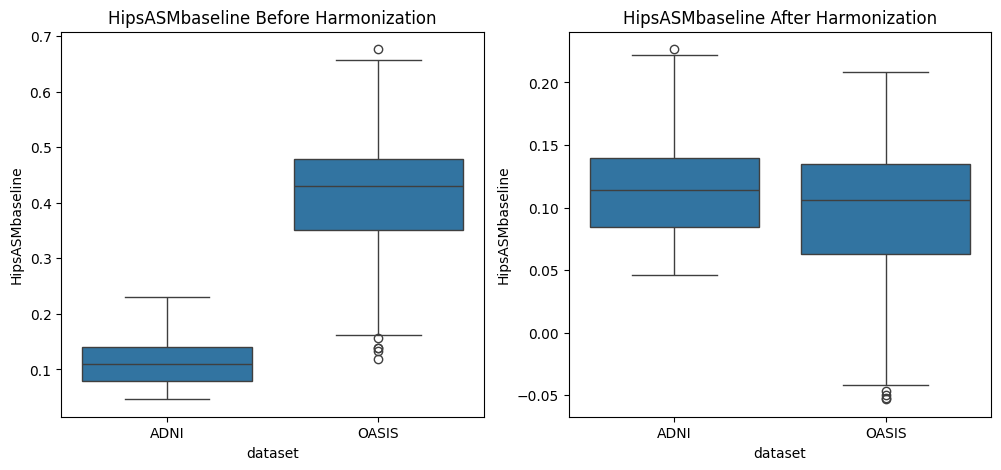

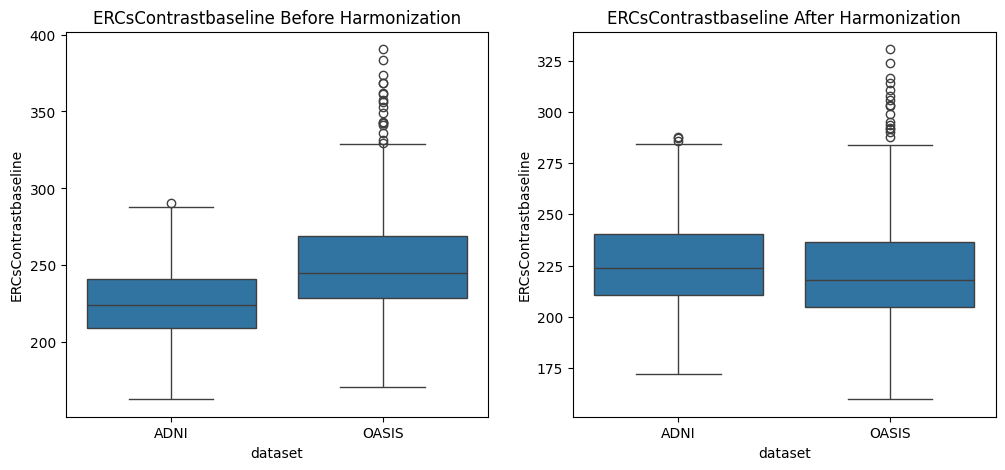

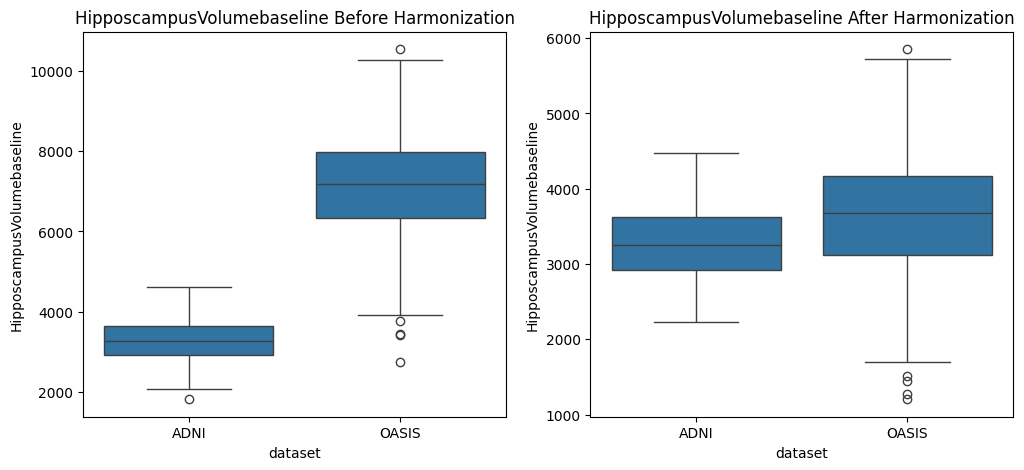

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a few features to visualize
example_features = ['HipsASMbaseline', 'ERCsContrastbaseline', 'HipposcampusVolumebaseline']

for feat in example_features:
    plt.figure(figsize=(12,5))

    # Before harmonization
    plt.subplot(1,2,1)
    sns.boxplot(x='dataset', y=feat, data=merged_df)
    plt.title(f'{feat} Before Harmonization')

    # After harmonization
    plt.subplot(1,2,2)
    sns.boxplot(x='dataset', y=feat, data=harmonized_df)
    plt.title(f'{feat} After Harmonization')

    plt.show()


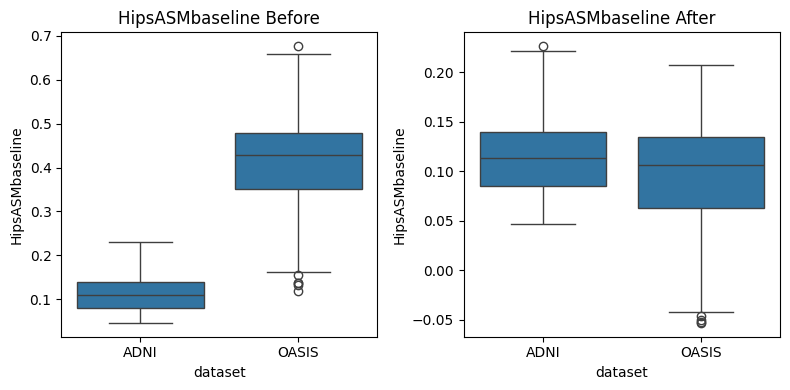

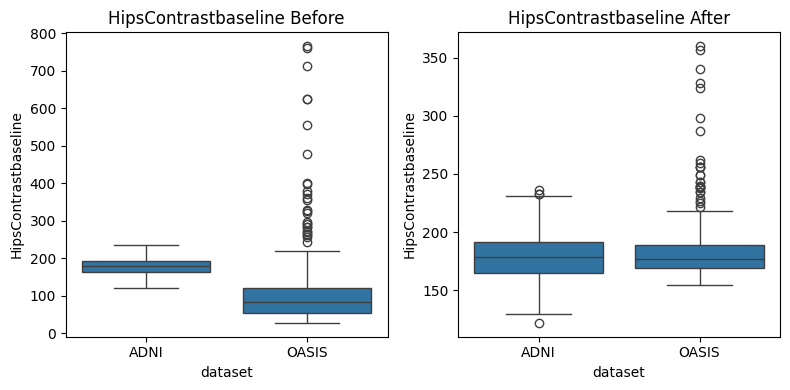

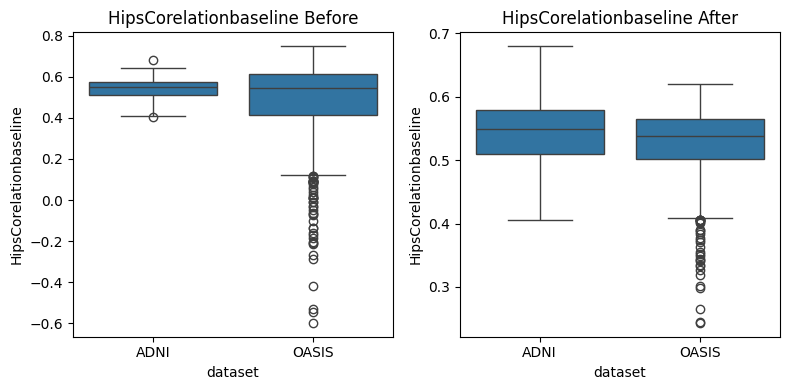

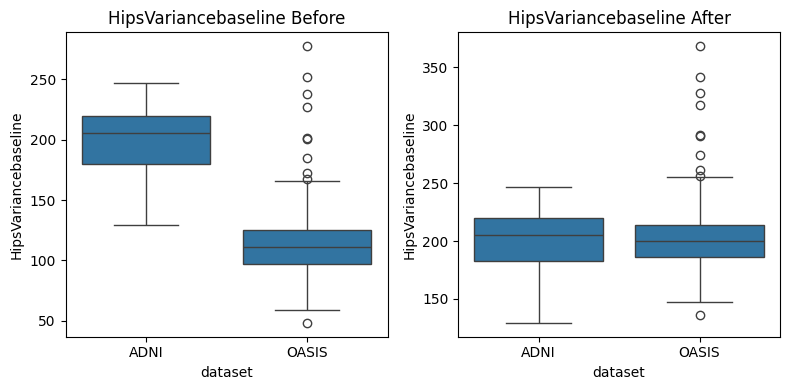

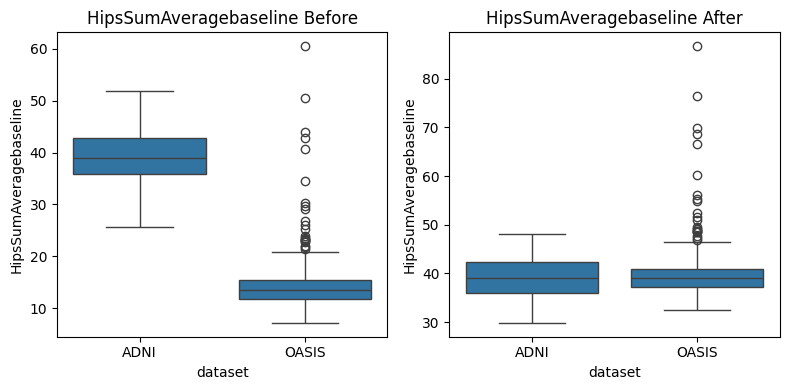

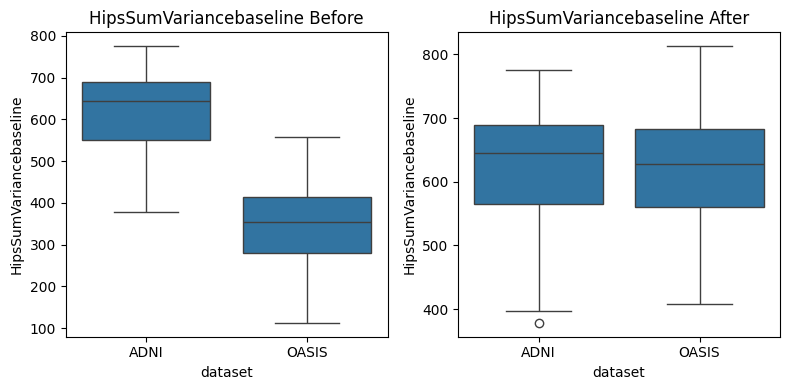

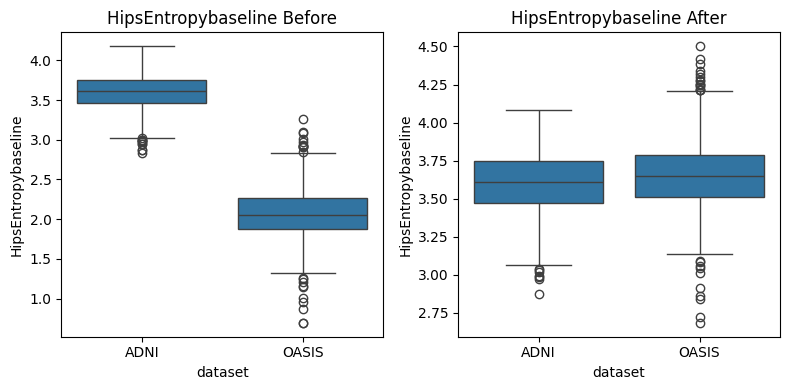

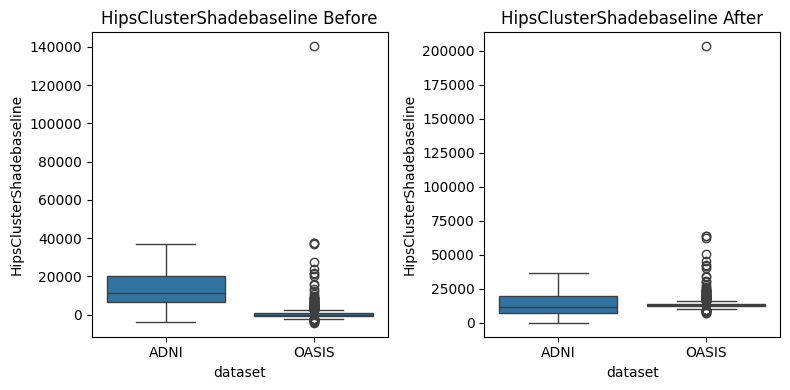

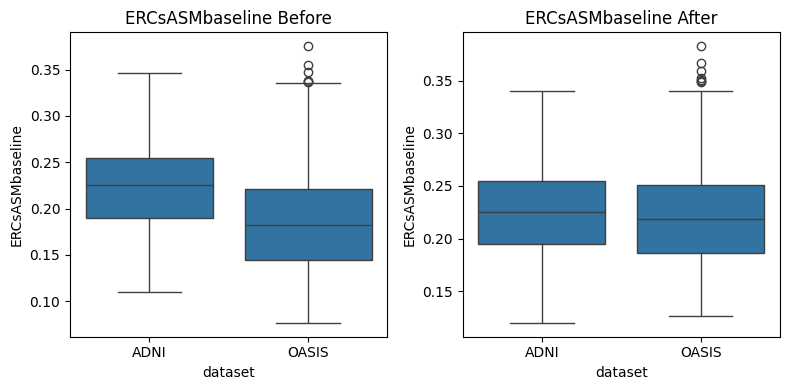

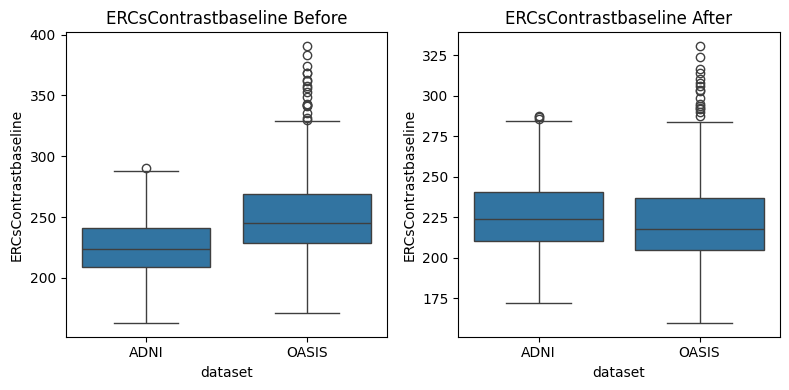

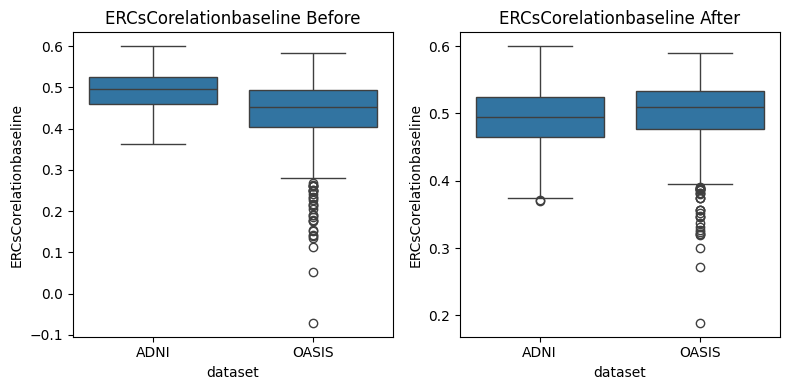

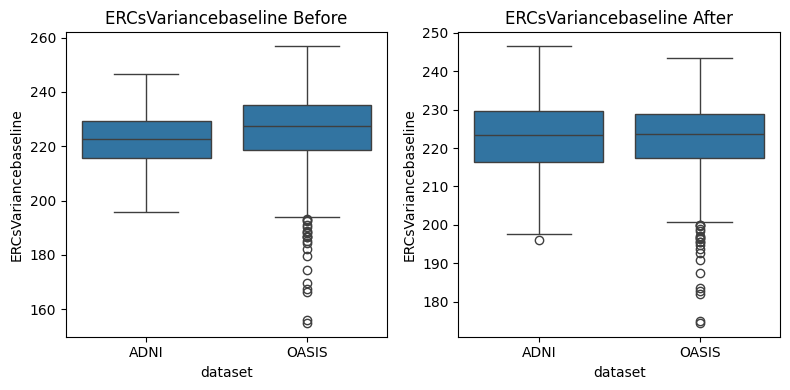

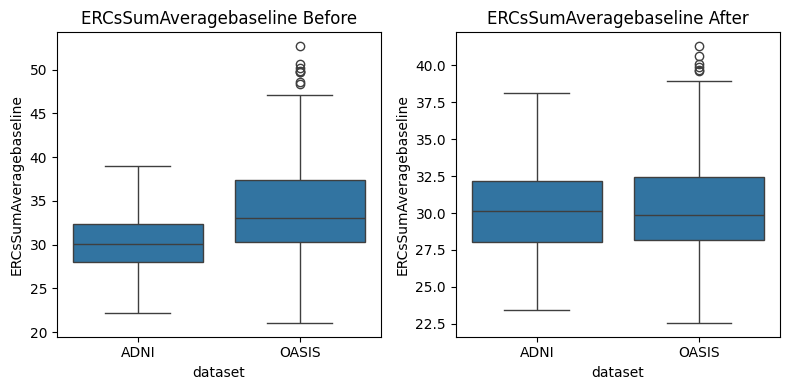

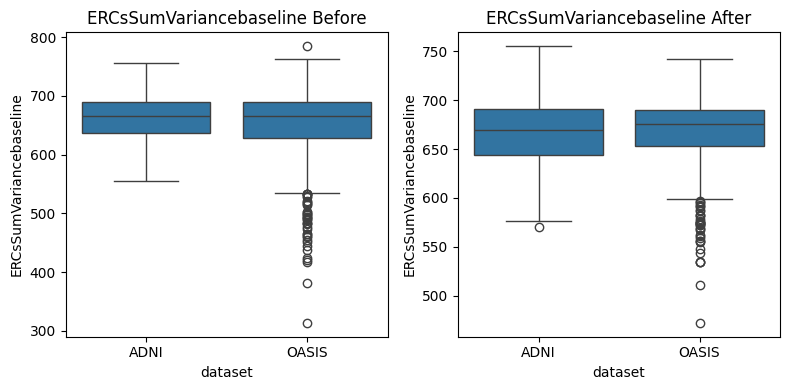

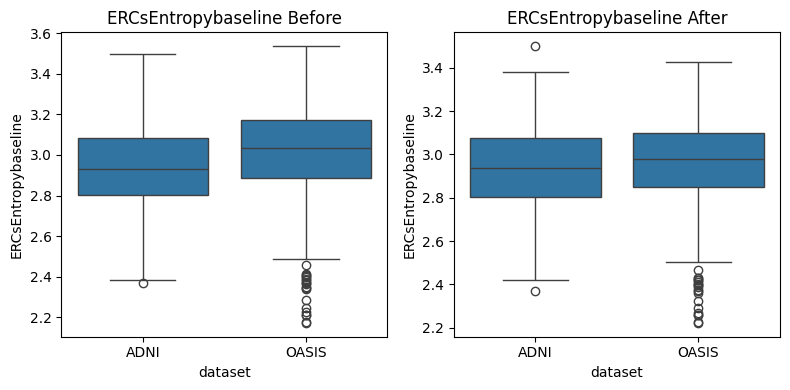

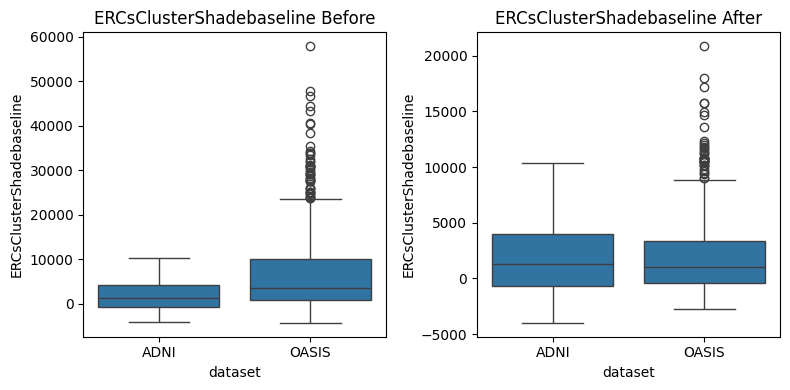

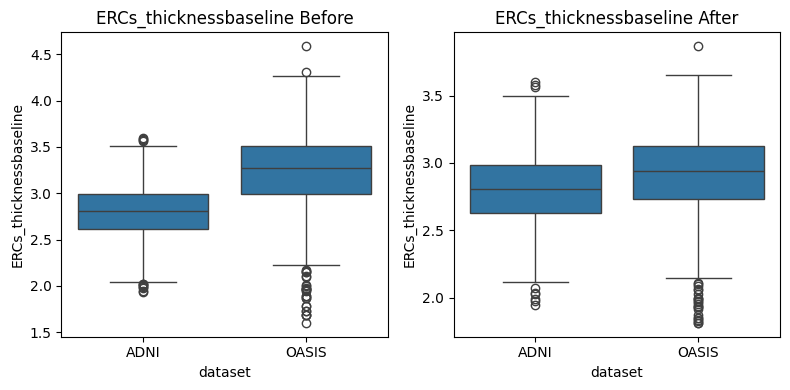

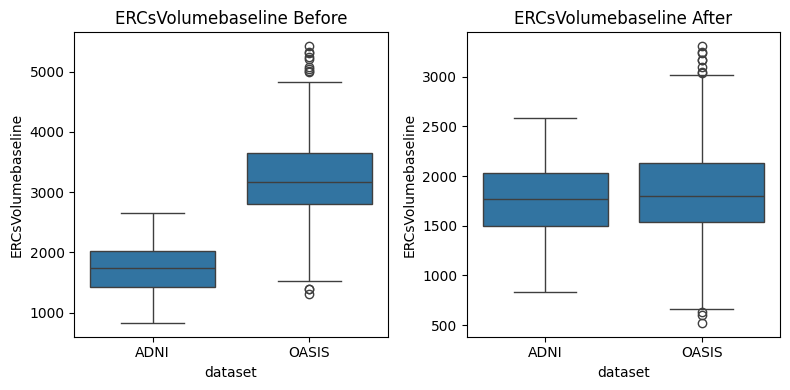

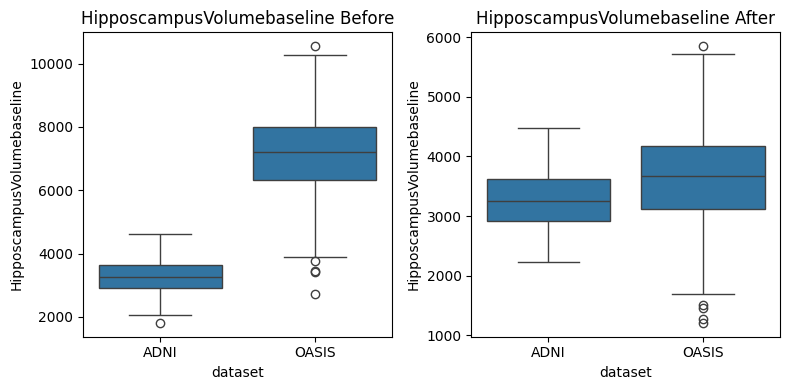

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for feat in features:
    plt.figure(figsize=(8,4))

    # Before harmonization
    plt.subplot(1,2,1)
    sns.boxplot(x='dataset', y=feat, data=merged_df)
    plt.title(f'{feat} Before')

    # After harmonization
    plt.subplot(1,2,2)
    sns.boxplot(x='dataset', y=feat, data=harmonized_df)
    plt.title(f'{feat} After')

    plt.tight_layout()
    plt.show()


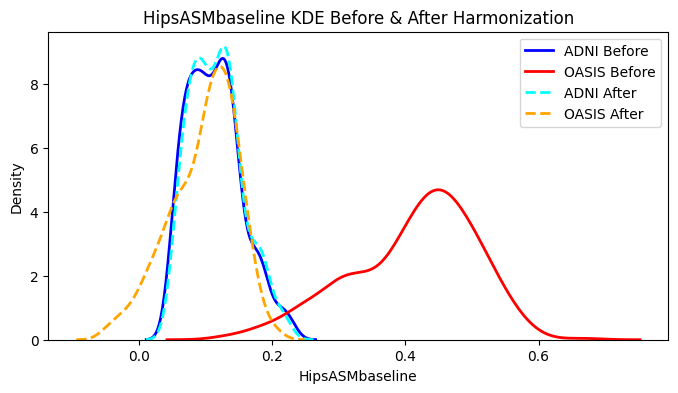

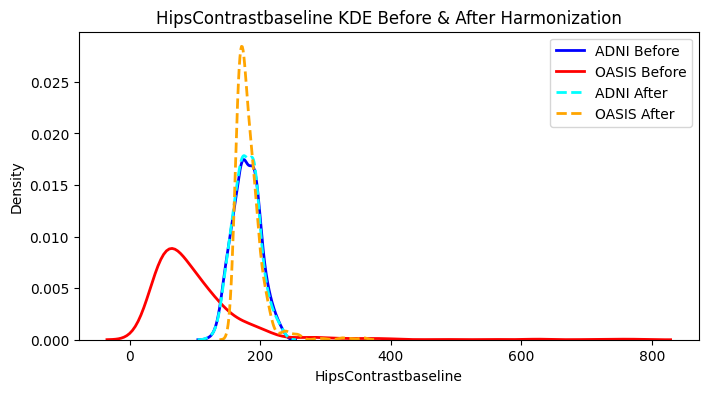

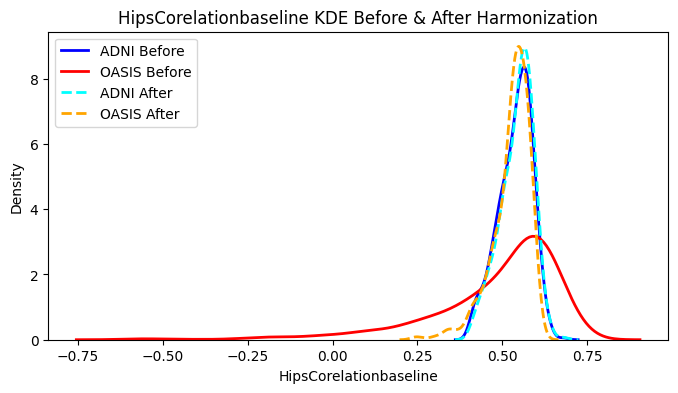

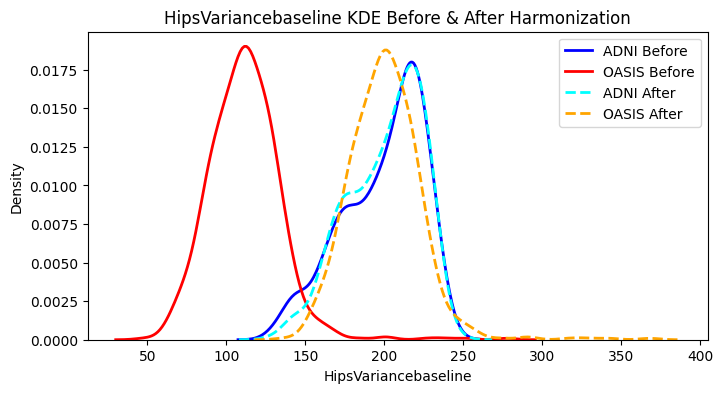

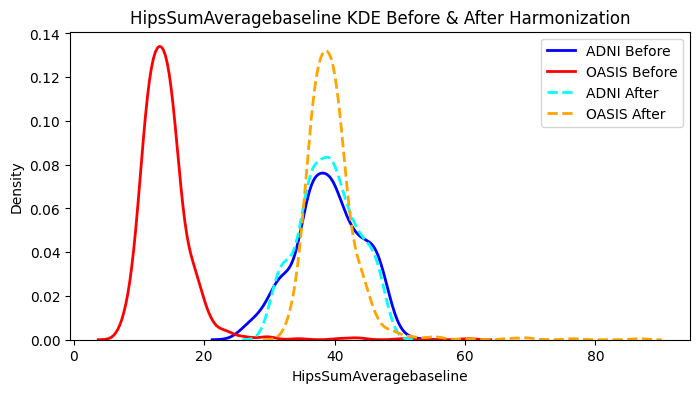

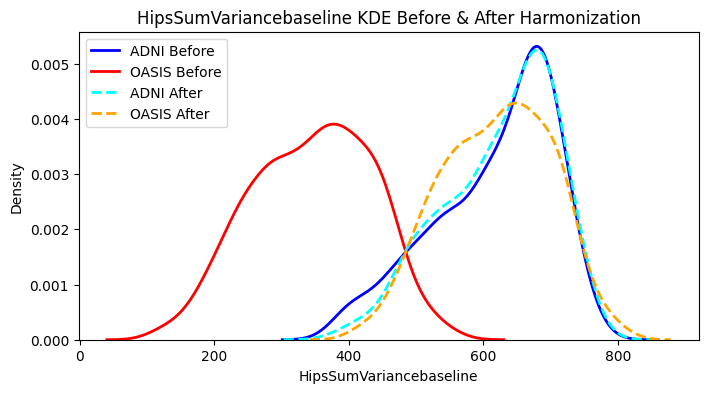

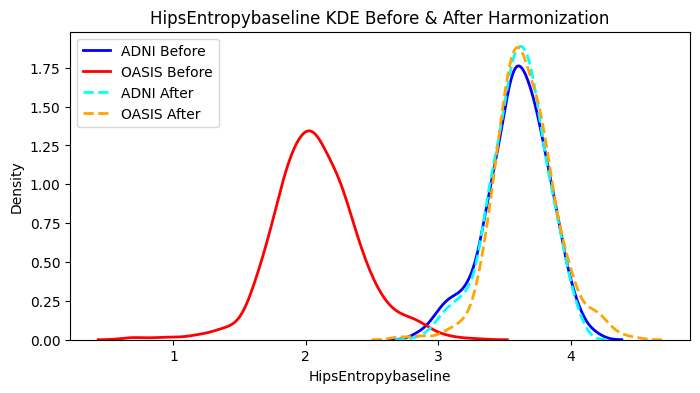

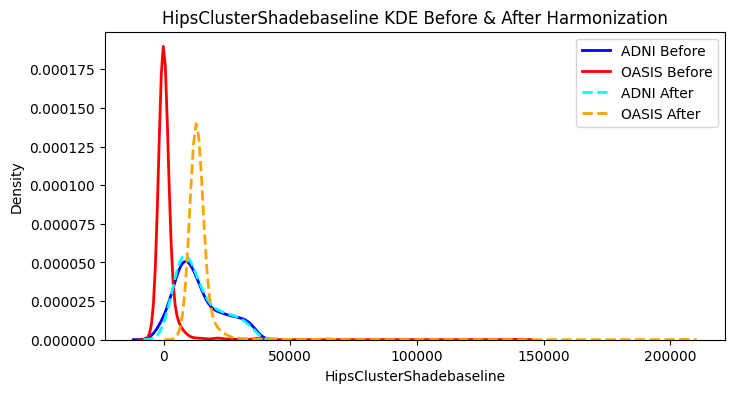

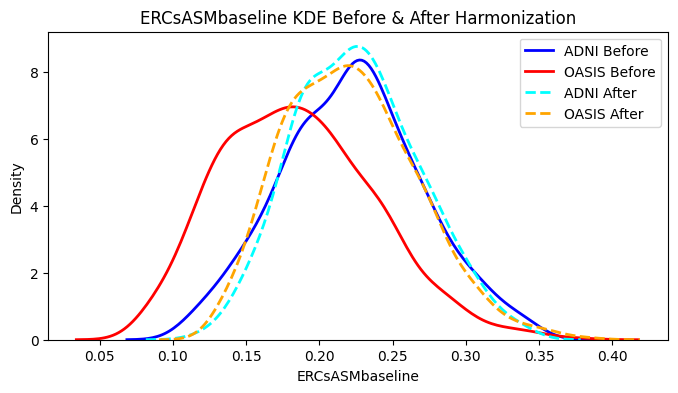

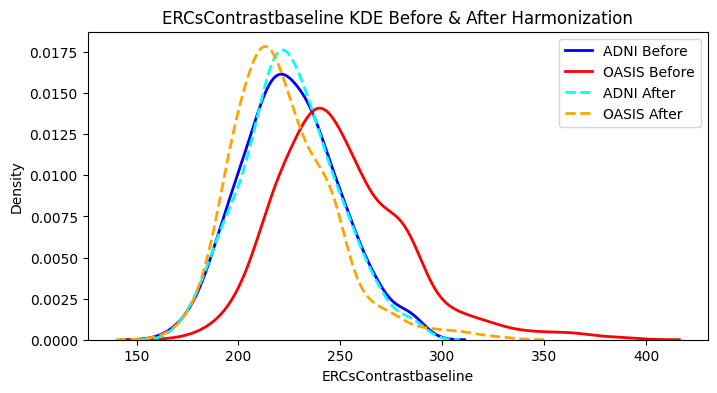

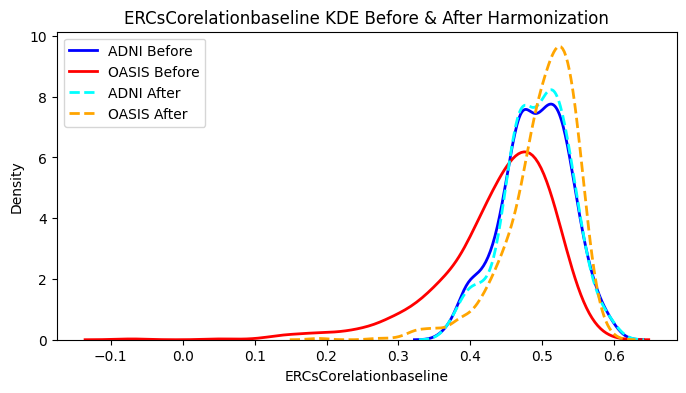

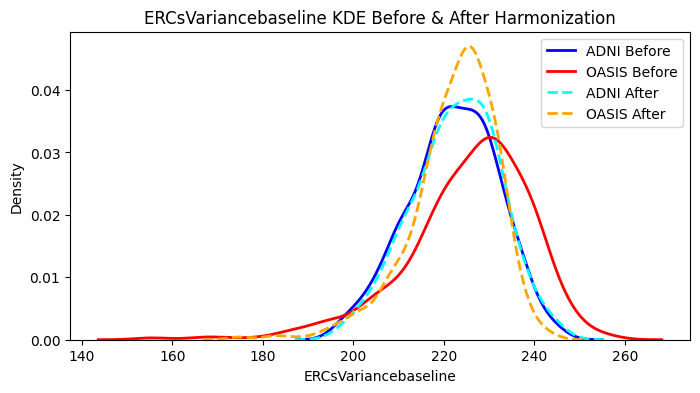

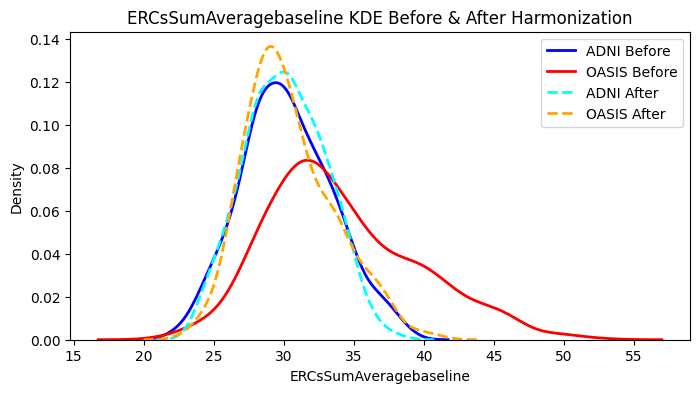

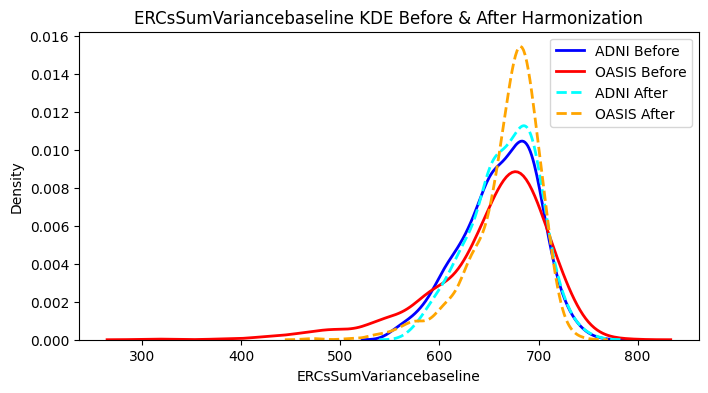

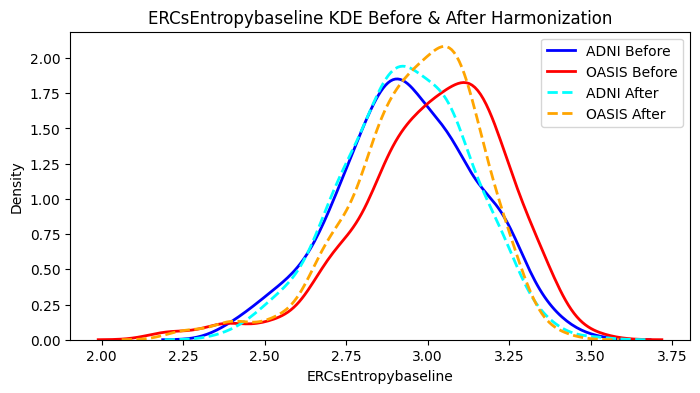

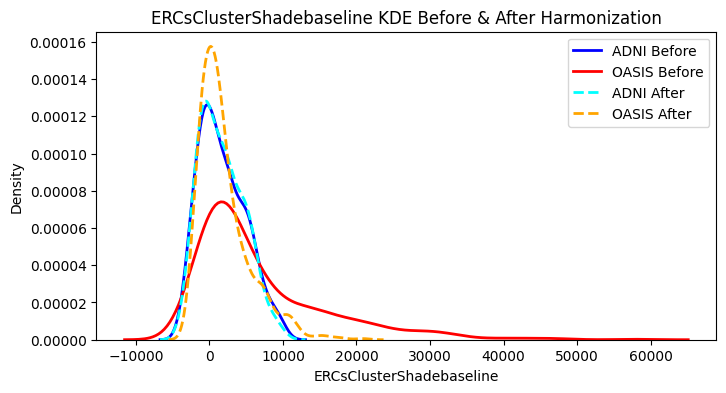

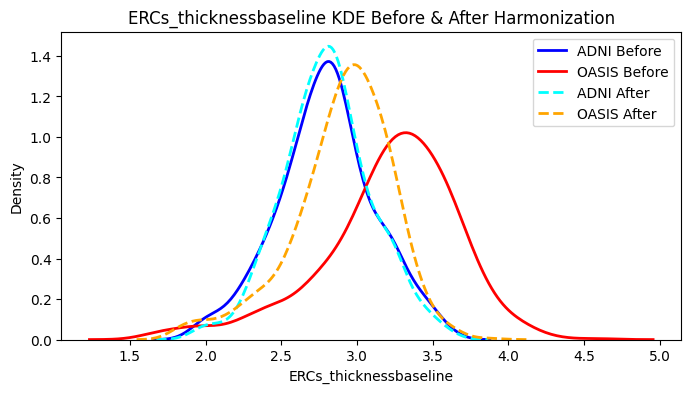

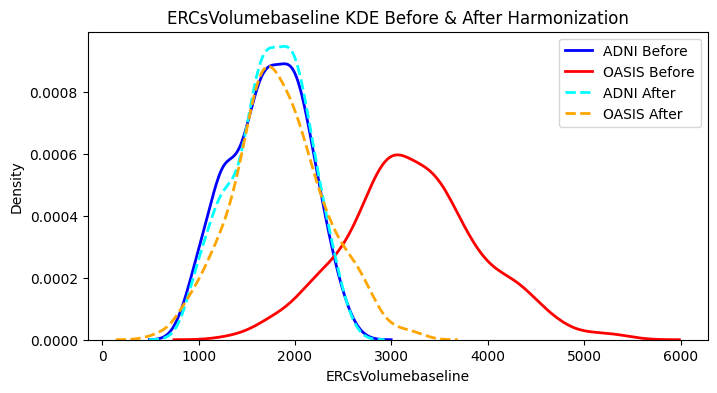

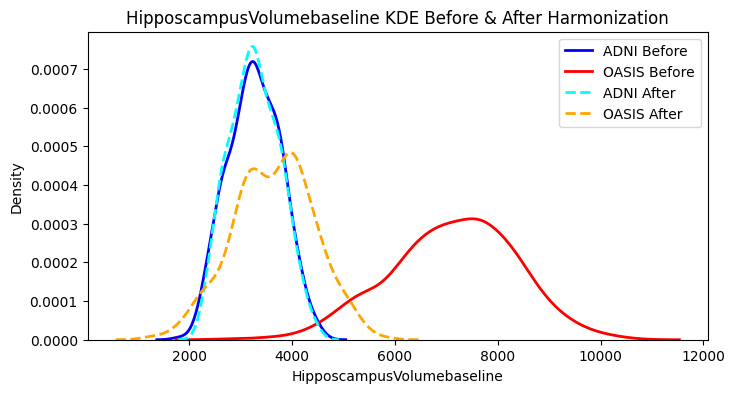

In [14]:
for feat in features:
    plt.figure(figsize=(8,4))

    sns.kdeplot(merged_df[merged_df['dataset']=='ADNI'][feat], label='ADNI Before', color='blue', lw=2)
    sns.kdeplot(merged_df[merged_df['dataset']=='OASIS'][feat], label='OASIS Before', color='red', lw=2)
    sns.kdeplot(harmonized_df[harmonized_df['dataset']=='ADNI'][feat], label='ADNI After', color='cyan', lw=2, linestyle='--')
    sns.kdeplot(harmonized_df[harmonized_df['dataset']=='OASIS'][feat], label='OASIS After', color='orange', lw=2, linestyle='--')

    plt.title(f'{feat} KDE Before & After Harmonization')
    plt.legend()
    plt.show()


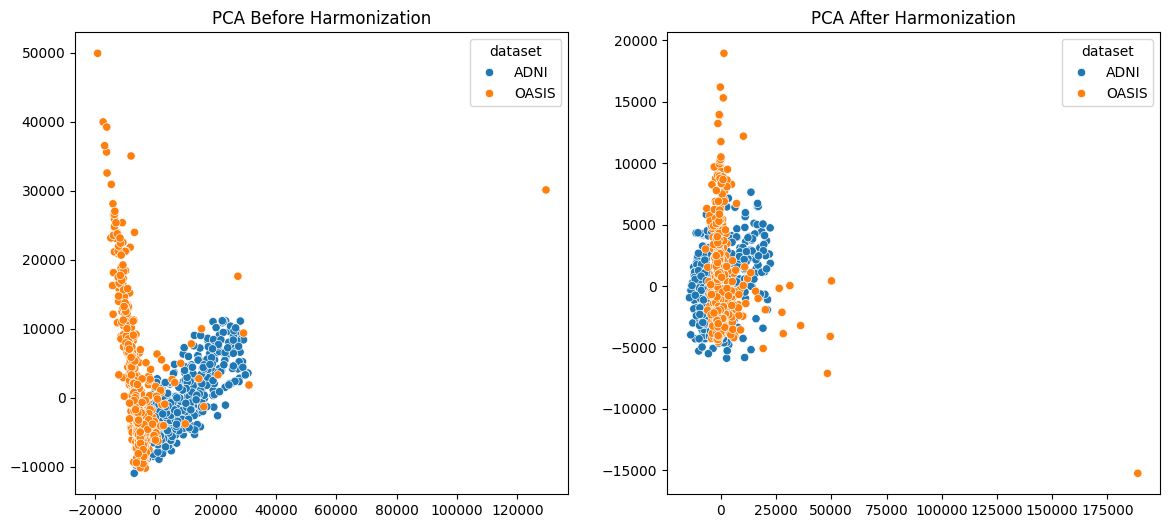

In [15]:
from sklearn.decomposition import PCA

# Fill NaNs with 0 for PCA
X_before = merged_df[features].fillna(0).values
X_after = harmonized_df[features].fillna(0).values

pca = PCA(n_components=2)
pca_before = pca.fit_transform(X_before)
pca_after = pca.fit_transform(X_after)

fig, axes = plt.subplots(1,2, figsize=(14,6))

# Before harmonization
sns.scatterplot(x=pca_before[:,0], y=pca_before[:,1], hue=merged_df['dataset'], ax=axes[0])
axes[0].set_title('PCA Before Harmonization')

# After harmonization
sns.scatterplot(x=pca_after[:,0], y=pca_after[:,1], hue=harmonized_df['dataset'], ax=axes[1])
axes[1].set_title('PCA After Harmonization')

plt.show()


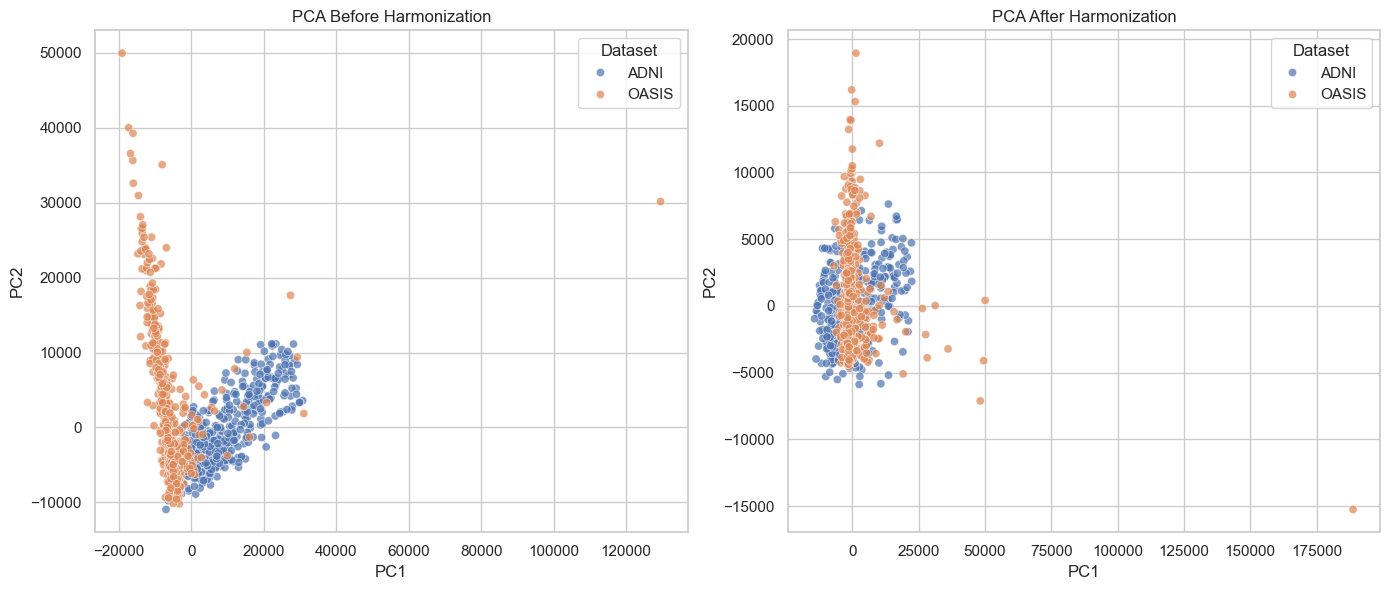

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# Set modern theme
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams.update({'font.size': 10})

# Prepare data for PCA
X_before = merged_df[features].fillna(0).values
X_after = harmonized_df[features].fillna(0).values

pca = PCA(n_components=2)

# Fit PCA
pca_before = pca.fit_transform(X_before)
pca_after = pca.fit_transform(X_after)

# Create DataFrames for easier plotting
pca_df_before = pd.DataFrame(pca_before, columns=['PC1', 'PC2'])
pca_df_before['dataset'] = merged_df['dataset'].values

pca_df_after = pd.DataFrame(pca_after, columns=['PC1', 'PC2'])
pca_df_after['dataset'] = harmonized_df['dataset'].values

# Plot PCA
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(
    x='PC1', y='PC2',
    hue='dataset',
    data=pca_df_before,
    palette=['#4c72b0', '#dd8452'],
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title("PCA Before Harmonization", fontsize=12)

sns.scatterplot(
    x='PC1', y='PC2',
    hue='dataset',
    data=pca_df_after,
    palette=['#4c72b0', '#dd8452'],
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title("PCA After Harmonization", fontsize=12)

for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(title='Dataset')

plt.tight_layout()
plt.show()


C:\Users\steve\AppData\Local\Temp\ipykernel_13720\4051983838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\steve\AppData\Local\Temp\ipykernel_13720\4051983838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\steve\AppData\Local\Temp\ipykernel_13720\4051983838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\steve\AppData\Local\Temp\ipykernel_13720\4051983838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

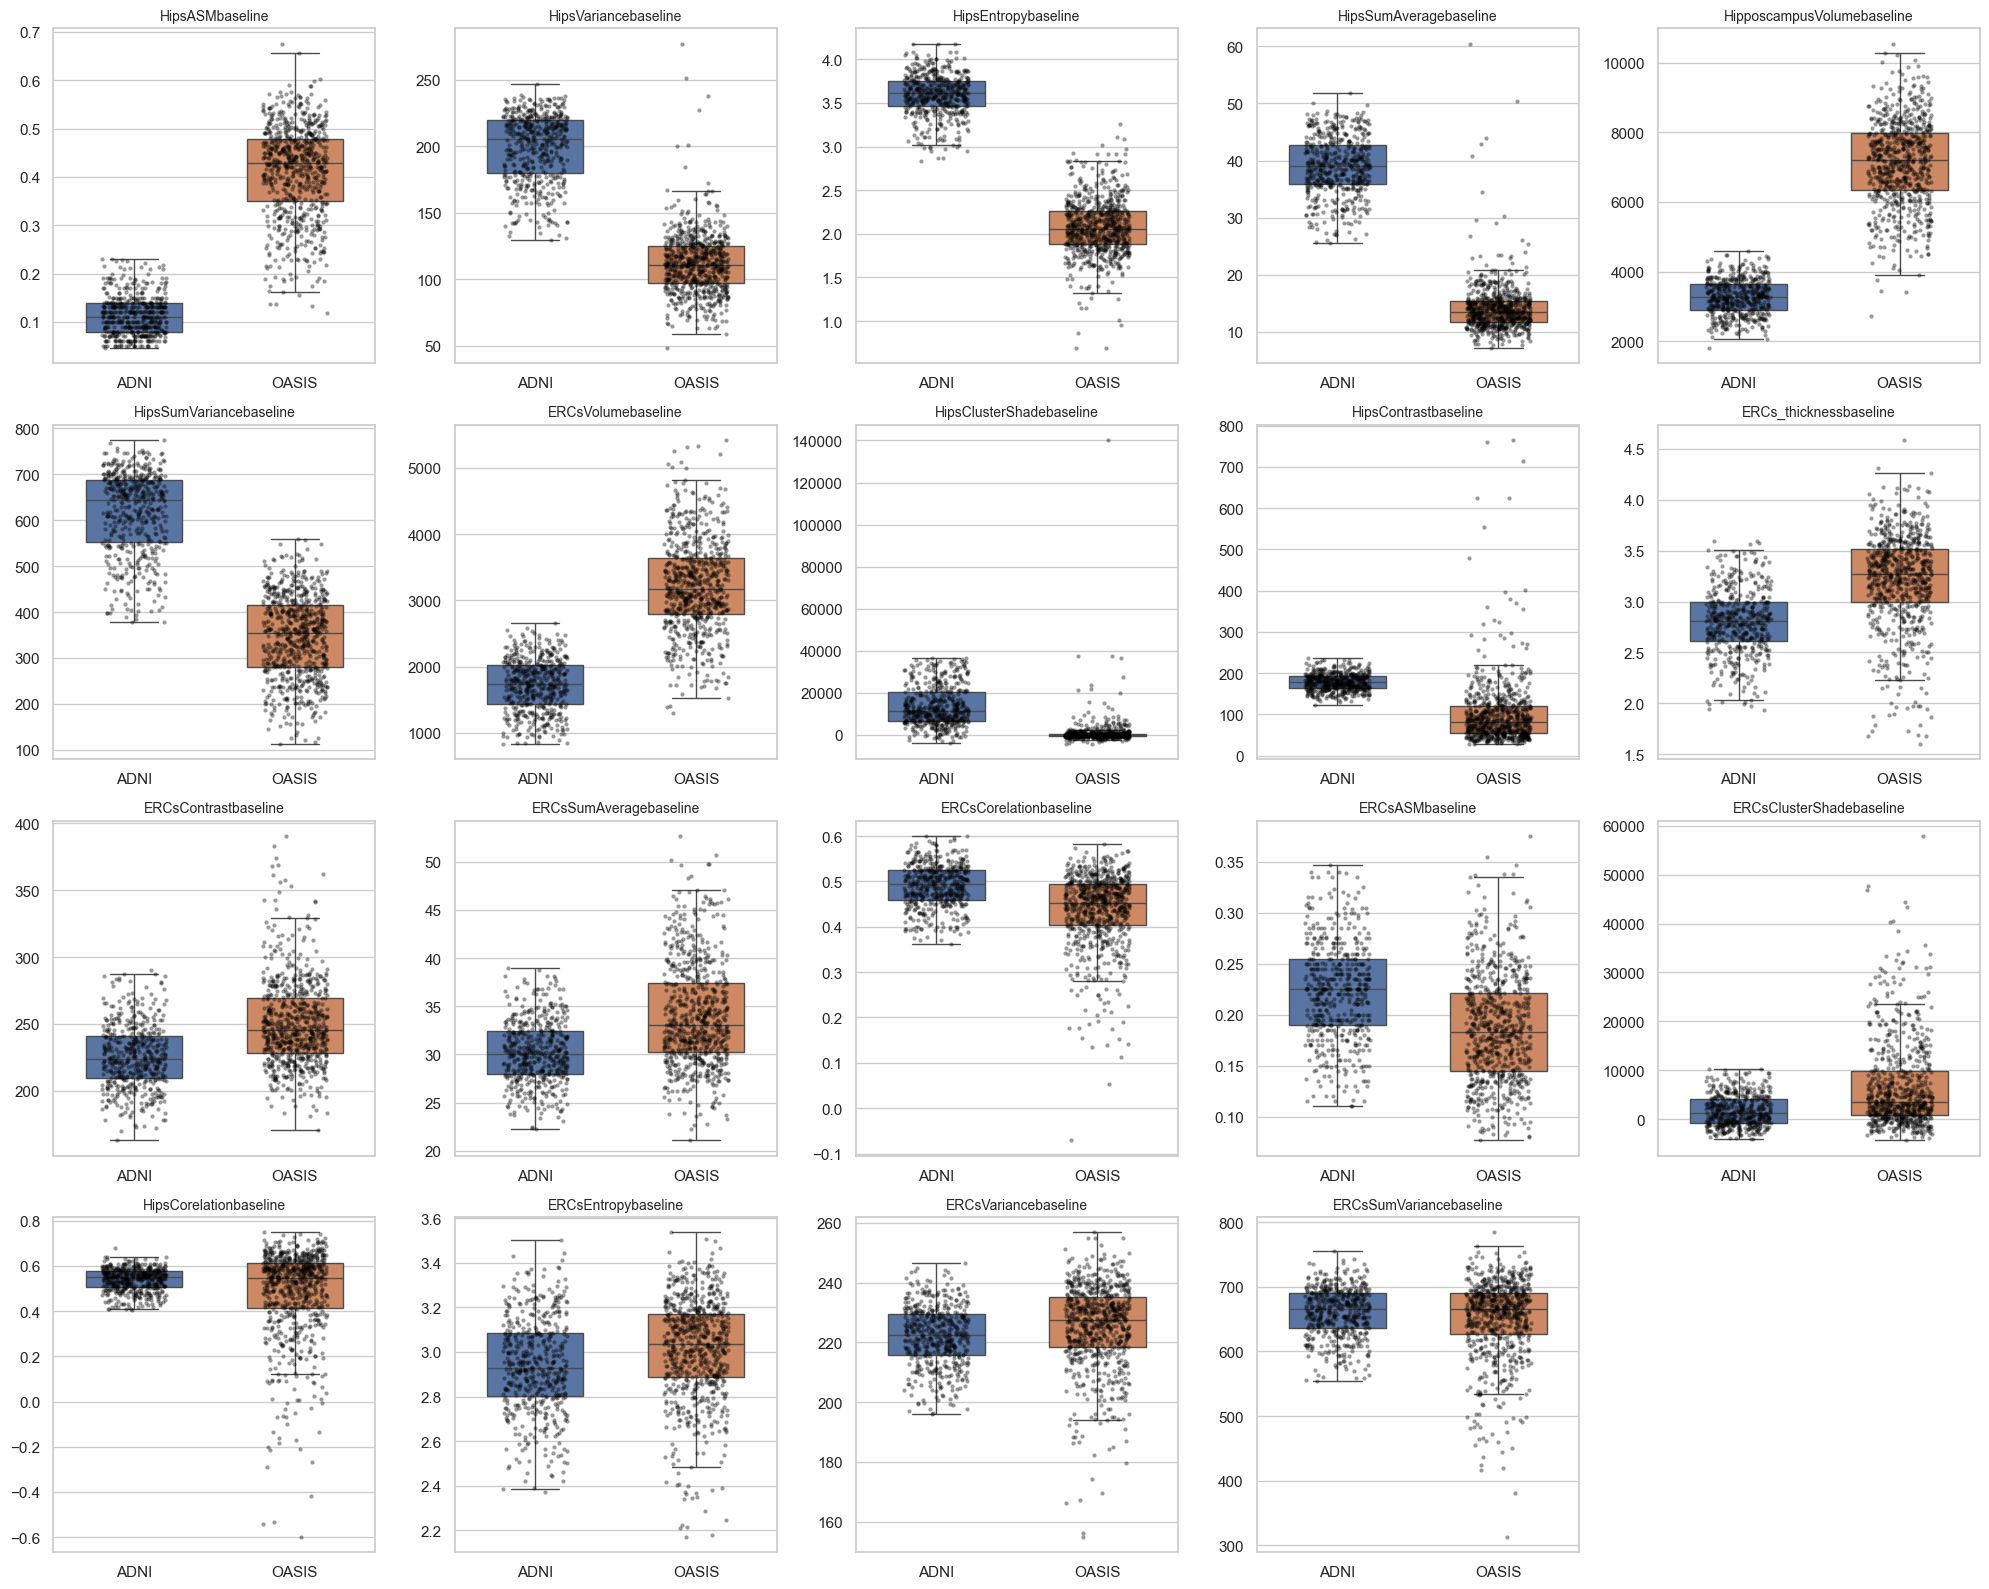

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set modern theme
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams.update({'font.size': 10})

# All features to plot (replace with your feature list)
features = anova_df.index.tolist()  

# Grid configuration
n_cols = 5
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    
    # Boxplot
    sns.boxplot(
        x='dataset',
        y=feat,
        data=merged_df,
        palette=['#4c72b0', '#dd8452'],
        showfliers=False,
        width=0.6,
        ax=ax
    )
    
    # Overlay points
    sns.stripplot(
        x='dataset',
        y=feat,
        data=merged_df,
        color='black',
        alpha=0.4,
        jitter=0.2,
        size=3,
        ax=ax
    )
    
    ax.set_title(feat, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


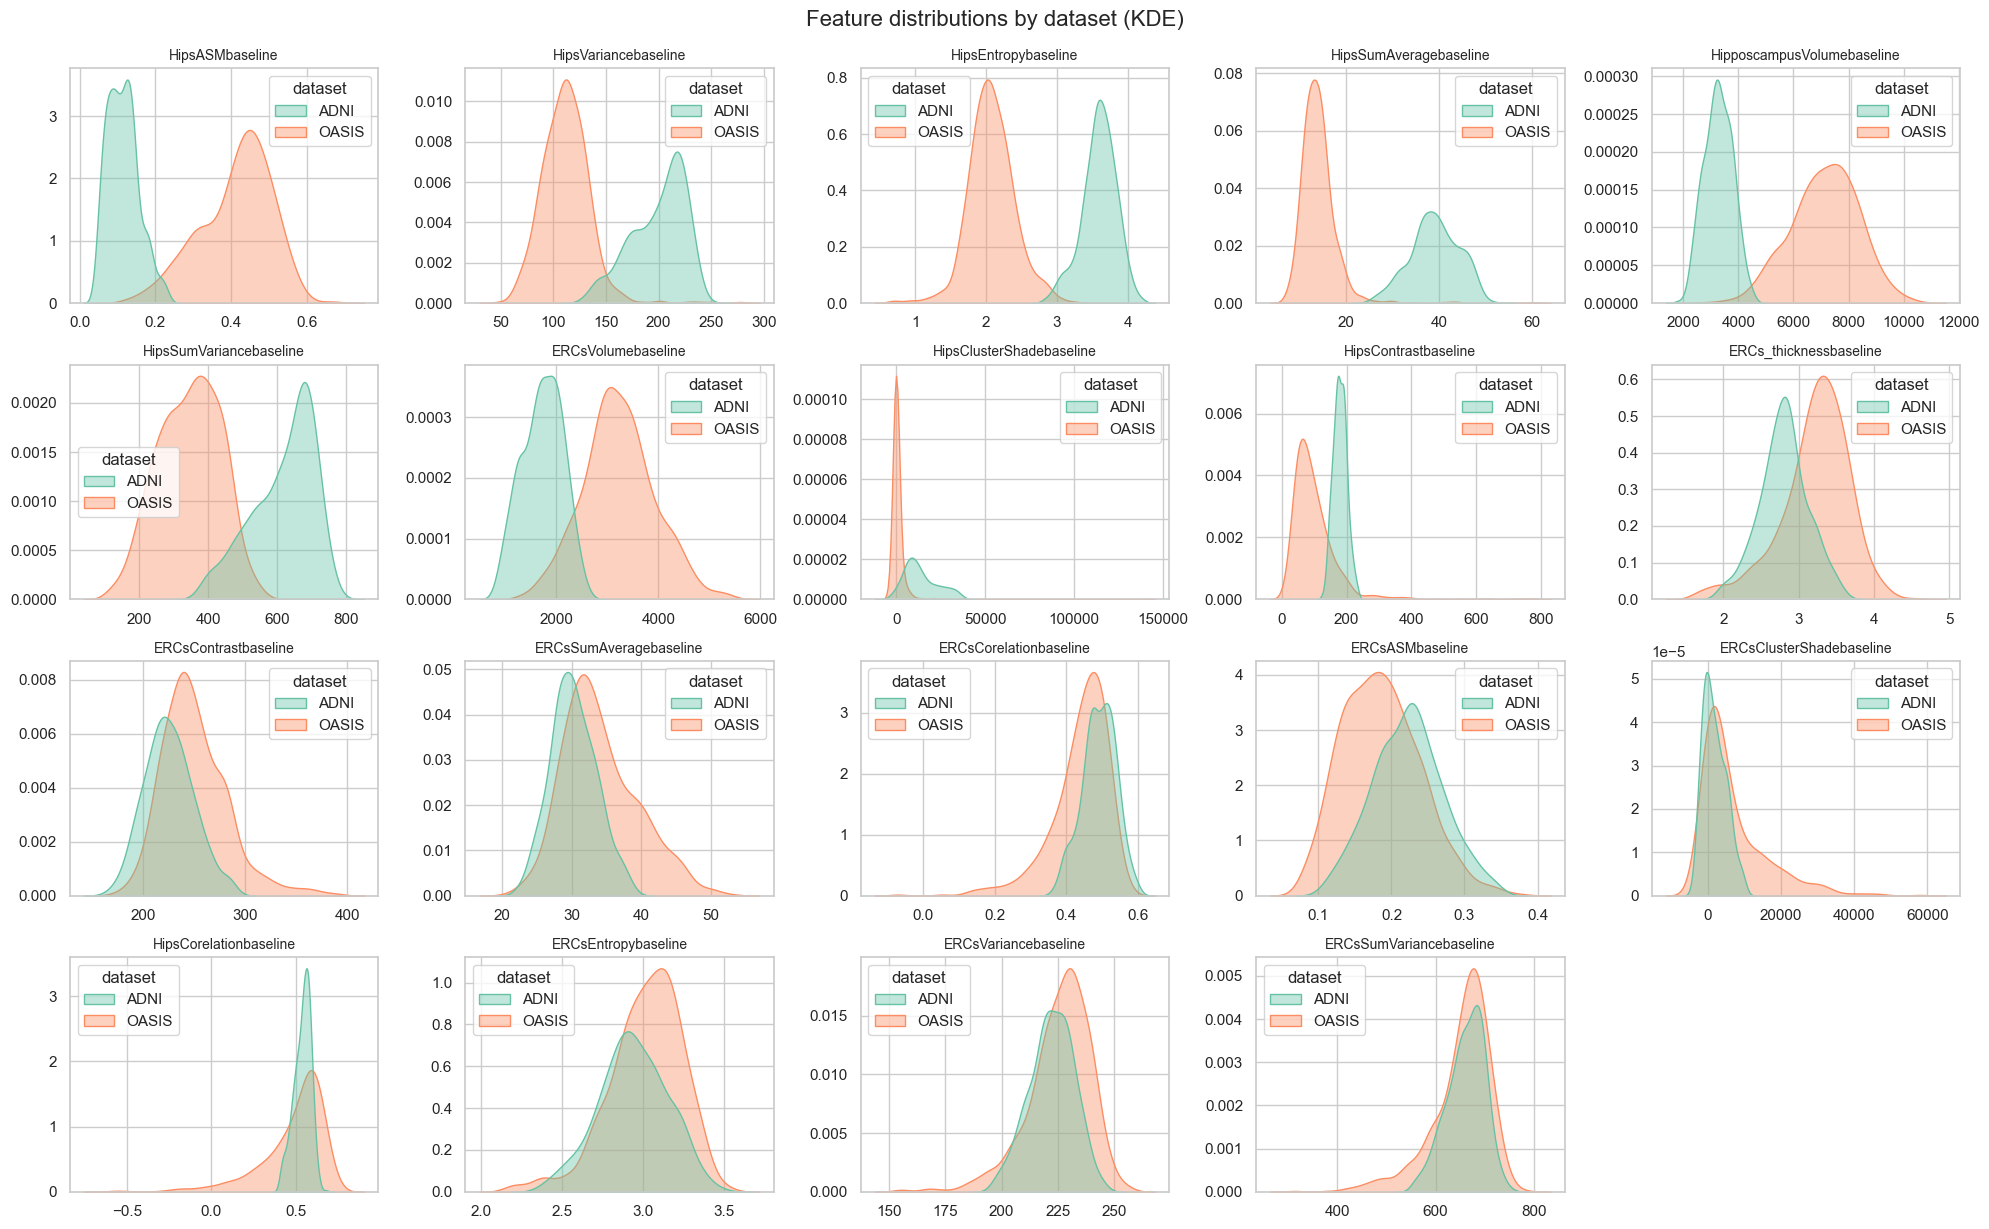

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot (replace with your selected features)
features = [
    'HipsASMbaseline', 'HipsVariancebaseline', 'HipsEntropybaseline', 
    'HipsSumAveragebaseline', 'HipposcampusVolumebaseline', 
    'HipsSumVariancebaseline', 'ERCsVolumebaseline', 'HipsClusterShadebaseline',
    'HipsContrastbaseline', 'ERCs_thicknessbaseline', 'ERCsContrastbaseline',
    'ERCsSumAveragebaseline', 'ERCsCorelationbaseline', 'ERCsASMbaseline',
    'ERCsClusterShadebaseline', 'HipsCorelationbaseline', 'ERCsEntropybaseline',
    'ERCsVariancebaseline', 'ERCsSumVariancebaseline'
]

# Determine grid size (rows x cols)
import math
cols = 5
rows = math.ceil(len(features) / cols)

# Set up the figure
plt.figure(figsize=(cols*4, rows*3))

# Plot each feature in a subplot
for i, feat in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data=merged_df, x=feat, hue='dataset', fill=True, alpha=0.4)
    plt.title(feat, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Feature distributions by dataset (KDE)", fontsize=16, y=1.02)
plt.show()


In [ ]:
from combat.pycombat import pycombat


In [ ]:
# -----------------------------
# 2. Harmonization (ComBat-GAM)
# -----------------------------
from neuroHarmonize import harmonizationLearn, harmonizationApply

# Split before harmonization (important to avoid leakage)
X = merged_df[features]
y = merged_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Metadata (covariates) for ComBat
meta_train = merged_df.loc[X_train.index, ['dataset', 'Ageatscreening', 'Gender', 'Diagnosis']]
meta_test  = merged_df.loc[X_test.index,  ['dataset', 'Ageatscreening', 'Gender', 'Diagnosis']]

# Learn ComBat parameters on training set only
model, X_train_harmonized = harmonizationLearn(
    X_train.values,
    meta_train.to_dict(orient='list')
)

# Apply harmonization to test set
X_test_harmonized = harmonizationApply(
    X_test.values,
    meta_test.to_dict(orient='list'),
    model
)

# Convert back to DataFrame
X_train_harmonized = pd.DataFrame(X_train_harmonized, columns=features, index=X_train.index)
X_test_harmonized  = pd.DataFrame(X_test_harmonized,  columns=features, index=X_test.index)


ModuleNotFoundError: No module named 'nibabel'

In [ ]:
# 1️⃣ Install pycombat if you haven't
# pip install pycombat

import pandas as pd
from pycombat import pycombat
from pycombat import combat
# -----------------------------
# 2. Prepare data for ComBat
# -----------------------------
# Assume your features are all numeric columns except 'RID', 'Diagnosis', 'dataset', 'Gender'
features = [col for col in adni.columns if col not in ['RID', 'Diagnosis', 'dataset', 'Gender']]

# Combine datasets
combined = pd.concat([adni, oasis], ignore_index=True)

# Extract feature matrix and batch info
X = combined[features].transpose()  # ComBat expects features as rows
batch = combined['dataset']         # 'dataset' should indicate batch, e.g., 'ADNI' or 'OASIS'

# -----------------------------
# 3. Apply ComBat
# -----------------------------
X_combat = pycombat(X, batch=batch)

# -----------------------------
# 4. Put back into dataframe
# -----------------------------
combined_corrected = combined.copy()
combined_corrected[features] = X_combat.transpose()

combined_corrected.head()


ImportError: cannot import name 'combat' from 'pycombat' (c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\pycombat\__init__.py)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from combat.pycombat import pycombat

# -----------------------------
# 1. Impute missing values (required for ComBat)
# -----------------------------
numeric_cols = [c for c in combined.columns if c not in ['RID','Diagnosis','dataset','Gender']]
imputer = SimpleImputer(strategy='mean')
combined[numeric_cols] = imputer.fit_transform(combined[numeric_cols])

# -----------------------------
# 2. Apply ComBat for batch correction
# -----------------------------
X = combined[numeric_cols].transpose()  # features as rows
batch = combined['dataset'].tolist()    # batch labels, e.g., 'ADNI' / 'OASIS'

X_corr = pycombat(X, batch)
combined_corrected = combined.copy()
combined_corrected[numeric_cols] = X_corr.transpose()

# -----------------------------
# 3. Optional: visualize batch effect using PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(combined[numeric_cols])
X_pca_after = pca.fit_transform(combined_corrected[numeric_cols])

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=X_pca_before[:,0], y=X_pca_before[:,1], hue=combined['dataset'], ax=axes[0])
axes[0].set_title('Before ComBat')
sns.scatterplot(x=X_pca_after[:,0], y=X_pca_after[:,1], hue=combined_corrected['dataset'], ax=axes[1])
axes[1].set_title('After ComBat')
plt.show()


ModuleNotFoundError: No module named 'combat'